In [1]:
# Importing libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading and cleaning data

df=pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
# Checking the Data head

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
# Checking the Data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
# Checking the columns

df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
# Checking the shape of the data

df.shape

(99457, 10)

In [7]:
# checking for missing values

df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
# Checking for duplicate values

df.duplicated().sum()

0

In [9]:
# Checking the uniqueness of the columns

df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [10]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## OBSERVATIONS

* The data is clean
* There is no missing value as well no duplicate value
* The average price is approximately 689.26
* The age of the customer ranges from 18 years to 69 years.
* Most customers are around the age 56
* Most Items cost 5250.
* Most quatity purchased by the customer is 5.
  


In [11]:
#Correlation Coefficient (check numerical columns that correlates with themselves)

df.corr(numeric_only = True)

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


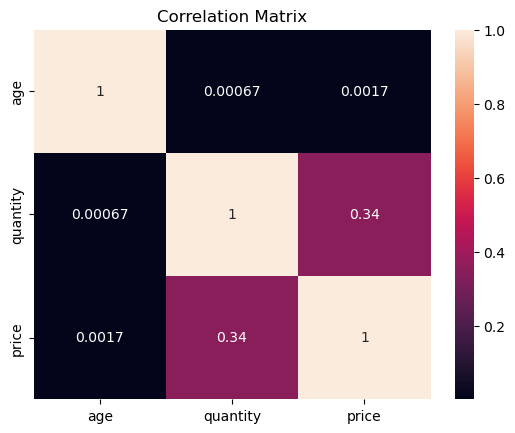

In [12]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title("Correlation Matrix")
plt.show()

Observation

It is observed that there is positive correlation between price and quantity.

# Time series application

In [13]:
# Renaming the invoice_ date into Date

df = df.rename(columns = {'invoice_date' : 'Date'})

In [14]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,Date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [15]:
# convert 'Date' to datetime and set as index

df['Date'] = pd.to_datetime(df['Date'], format = "mixed")
df.set_index('Date', inplace = True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall
Date,,,,,,,,,
2022-05-08,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul
2021-09-11,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity
2021-05-16,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon
...,...,...,...,...,...,...,...,...,...
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul
2021-03-28,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity


In [16]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall
Date,,,,,,,,,
2022-05-08,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul
2021-09-11,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity
2021-05-16,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon
...,...,...,...,...,...,...,...,...,...
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul
2021-03-28,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity


In [17]:
# select the customer shopping for 2021

df.loc['2021']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall
Date,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul
2021-09-11,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity
2021-05-16,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul
...,...,...,...,...,...,...,...,...,...
2021-08-29,I332105,C231387,Female,65,Shoes,4,2400.68,Credit Card,Metropol AVM
2021-09-10,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul


In [18]:
# Checking for 7 -day rolling average of the price 

df['7_day_rolling'] = df['price'].rolling(window = 7).mean()
df['7_day_rolling']

Date
2022-05-08           NaN
2021-12-12           NaN
2021-09-11           NaN
2021-05-16           NaN
2021-10-24           NaN
                 ...    
2022-09-21    438.072857
2021-09-22    438.820000
2021-03-28    424.954286
2021-03-16    682.000000
2022-10-15    644.158571
Name: 7_day_rolling, Length: 99457, dtype: float64

In [19]:
# Checking for 30 -day rolling average of the price

df['30_day_rolling'] = df['price'].rolling(window = 30).mean()
df['30_day_rolling']

Date
2022-05-08           NaN
2021-12-12           NaN
2021-09-11           NaN
2021-05-16           NaN
2021-10-24           NaN
                 ...    
2022-09-21    470.961333
2021-09-22    467.244000
2021-03-28    362.592667
2021-03-16    500.203333
2022-10-15    481.370667
Name: 30_day_rolling, Length: 99457, dtype: float64

In [20]:
# Extract time variable

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,7_day_rolling,30_day_rolling,year,month,day
Date,,,,,,,,,,,,,,
2022-05-08,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,NaN,NaN,2022,5,8
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,NaN,NaN,2021,12,12
2021-09-11,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,NaN,NaN,2021,9,11
2021-05-16,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,NaN,NaN,2021,5,16
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,NaN,NaN,2021,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,438.072857,470.961333,2022,9,21
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,438.820000,467.244000,2021,9,22
2021-03-28,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,424.954286,362.592667,2021,3,28


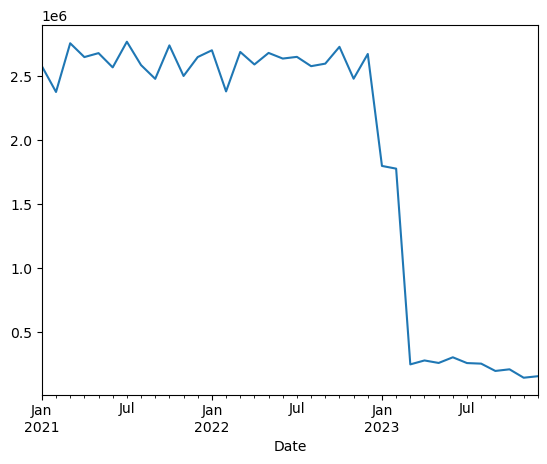

In [21]:
# To plot the Monthly Price

df.resample('ME').sum()['price'].plot()
plt.show()

In [22]:
# To plot the Monthly Price

df.resample('YE').sum()['price']

Date
2021-12-31    31316304.63
2022-12-31    31372826.18
2023-12-31     5862235.10
Freq: YE-DEC, Name: price, dtype: float64

<Axes: xlabel='Date'>

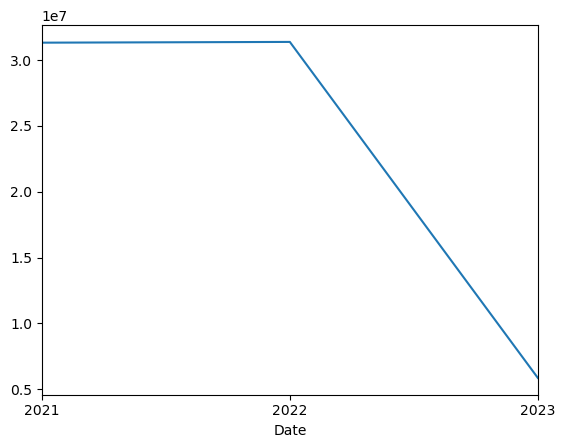

In [23]:
df.resample('YE').sum()['price'].plot()

# Customer and Product ANALYSIS

In [24]:
#PRICE BY CATEGORY

Total_Category = df['price'].groupby(by = df['category']).sum().sort_values(ascending = False).reset_index()
Total_Category

,category,price
0,Clothing,31075684.64
1,Shoes,18135336.89
2,Technology,15772050.00
3,Cosmetics,1848606.90
4,Toys,1086704.64
5,Food & Beverage,231568.71
6,Books,226977.30
7,Souvenir,174436.83


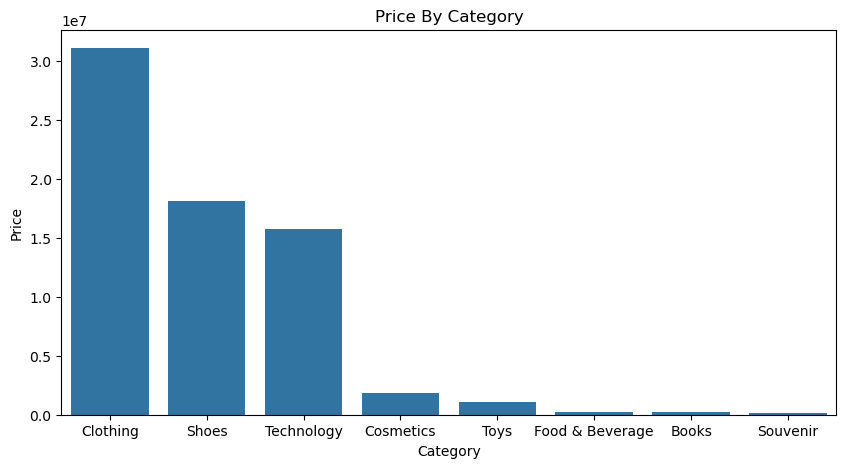

In [25]:
# Visualization using barchart
plt.figure(figsize = (10, 5))
sns.barplot(data = Total_Category, x = "category", y = "price")
plt.title("Price By Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

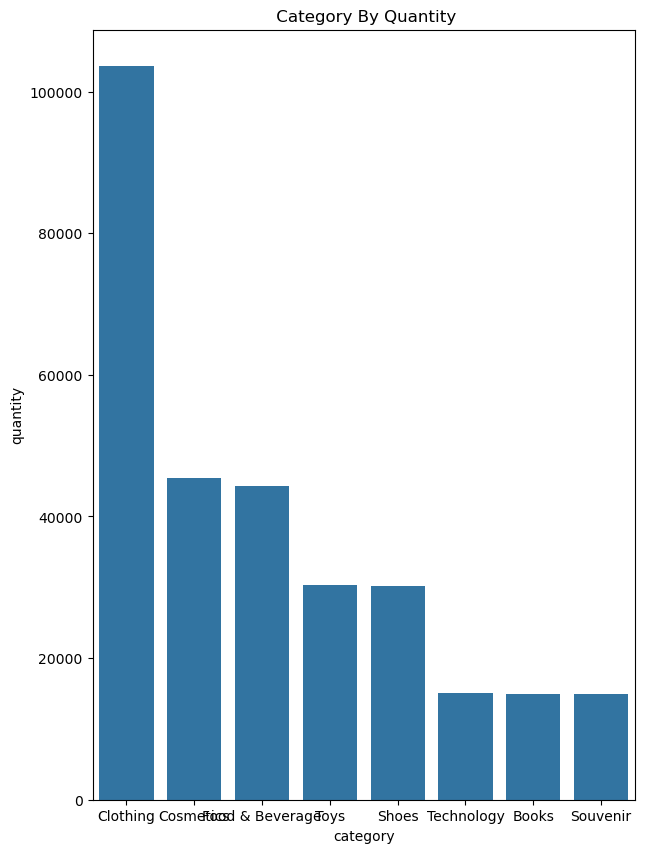

In [26]:
# Category by Quantity and visualization

Quantity_Categ = df['quantity'].groupby(by= df['category']).sum().sort_values(ascending = False).reset_index()
Quantity_Categ

plt.figure(figsize = (7,10))
sns.barplot(data = Quantity_Categ, x = "category", y = "quantity")
plt.title(" Category By Quantity")
plt.show()

In [27]:
# Total quantity by payment method and visualization

qty_by_pay = df['quantity'].groupby(by = df['payment_method']).sum().reset_index()
qty_by_pay


,payment_method,quantity
0,Cash,133370
1,Credit Card,105045
2,Debit Card,60297


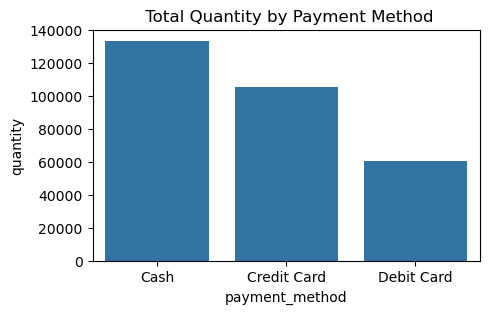

In [28]:
plt.figure(figsize = (5,3))
sns.barplot(data = qty_by_pay, x = "payment_method", y = "quantity")
plt.title(" Total Quantity by Payment Method")
plt.show()

In [29]:
# Total price by payment method
Total_price_pay = df['price'].groupby(by = df['payment_method']).sum().sort_values(ascending = False).reset_index()
Total_price_pay

,payment_method,price
0,Cash,30705030.98
1,Credit Card,24051476.93
2,Debit Card,13794858.00


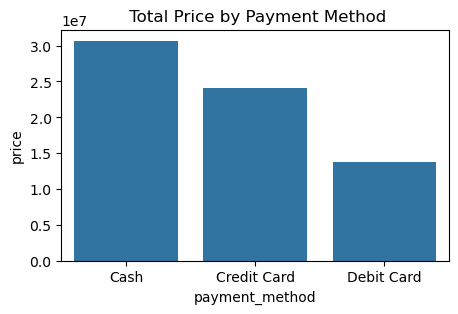

In [30]:
plt.figure(figsize = (5,3))
sns.barplot(data = Total_price_pay, x = "payment_method", y = "price")
plt.title(" Total Price by Payment Method")
plt.show()

In [31]:
## Age rate by Gender and visualisation

age_rate_gend = df['age'].groupby(by = df['gender']).sum()

# percentage by gender
round(age_rate_gend/age_rate_gend.sum(),1)

gender
Female    0.6
Male      0.4
Name: age, dtype: float64

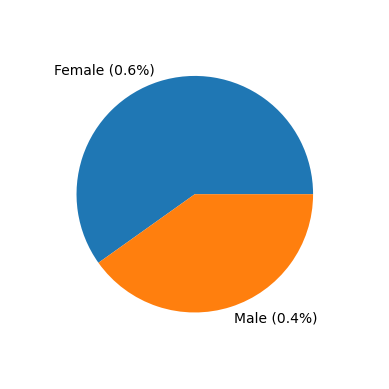

In [32]:
plt.pie(age_rate_gend, labels = [ 'Female (0.6%)','Male (0.4%)'], radius = 0.8)
plt.show()

# Recommendations

* with the critical inspection of the category by quantity, the female clothing is on high side therefore the availability, quality standard
  and the legacy should be maintained
* The book and Technology section needs improvement, and a kind of gifting or advert should be introduced to create widely awareness to the public
* The services of the debit cards should be looked into and make it more robust to encourage the debit card holder for wide range patronage.
* The age should also be put into consideration especially the younger age, a kind of questionaire techniques should be carried out to know the area of 
  interest among younger ones 
  